#Wine Reviews EDA
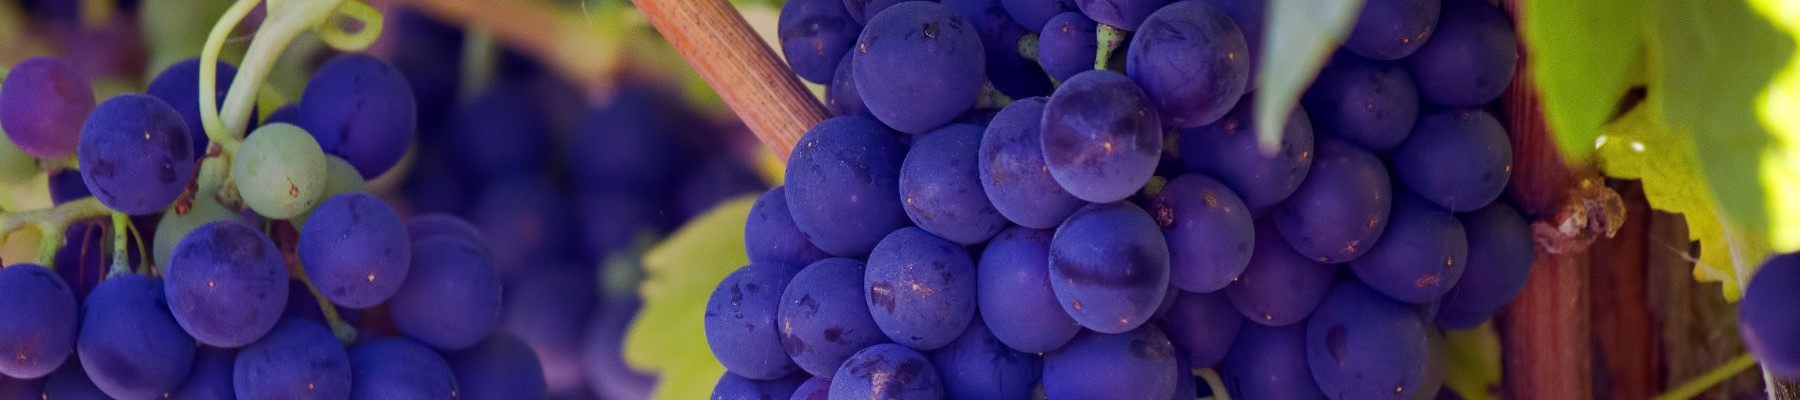

EDA on wine reviews data set scraped from the Wine Enthusiast website (a magazine and ecommerce business) by Kaggle user zackthoutt during the week of June 15th, 2017. Includes the wine's country of origin, variety, points awarded, price, detailed descriptions, and more. For more information, click [here](https://www.kaggle.com/datasets/zynicide/wine-reviews?select=winemag-data-130k-v2.csv).



Questions to be answered:
1. Which country produces wine with the most points, on average? (descriptive statistics)
2. Which taster gives the lowest scores (points), on average?
3. Which variety of wine is the most expensive, on average?
4. Which year of wines has the best score (points), on average?
5. Do reviews with the word "depth" in them tend to get better than average or worse than average points?
6. Do reviews with the word "fruity" in them tend to get better than average or worse than average points?
7. Do reviews with the word "herbal" in them tend to get better than average or worse than average points?
8. Do reviews with more letters award more or less points, on average?
9. Which region of the province Sicily & Sardinia produces the best wine, on average?

# Dataset

In [ ]:
import pandas as pd
df = pd.read_csv('/content/wine.csv')

In [ ]:
df.head()

,country,description,designation,points,price,province,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


1. Which country produces wine with the most points, on average? (descriptive statistics)

On average, England, India, and Austria produce the most wine. England has the most points at 91.58.

In [ ]:
avg_points_country = df.groupby('country')['points'].mean()
avg_points_country.sort_values(ascending=False).round(2)

,points
country,
England,91.58
India,90.22
Austria,90.10
Germany,89.85
Canada,89.37
Hungary,89.19
China,89.00
France,88.85
Luxembourg,88.67


2. Which taster gives the lowest scores (points), on average?

Alexander Peartree gives the lowest points with an average of 85.86.

In [ ]:
avg_taster_points = df.groupby('taster_name')['points'].mean()
avg_taster_points.sort_values(ascending=True).round(2)

,points
taster_name,
Alexander Peartree,85.86
Carrie Dykes,86.40
Susan Kostrzewa,86.61
Fiona Adams,86.89
Michael Schachner,86.91
Lauren Buzzeo,87.74
Christina Pickard,87.83
Jeff Jenssen,88.32
Anna Lee C. Iijima,88.42


3. Which variety of wine is the most expensive, on average?

On average, the Ramisco variety is the most expensive.

In [ ]:
variety_price = df.groupby('variety')['price'].mean()
variety_price.sort_values(ascending=False).round(2)

,price
variety,
Ramisco,495.00
Terrantez,236.00
Francisa,160.00
Rosenmuskateller,150.00
Malbec-Cabernet,113.33
...,...
Roscetto,NaN
Sauvignon Blanc-Sauvignon Gris,NaN
Tempranillo-Malbec,NaN


4. Which year of wines has the best score (points), on average?

1969 appears to have the most points on average.

In [ ]:
df['year'] = df['title'].str.extract(r'((?:19|20)\d{2})')

In [ ]:
avg_points_by_year = df.groupby('year')['points'].mean()

In [ ]:
avg_points_by_year.sort_values(ascending=False)

,points
year,
1969,98.000000
1973,96.000000
1952,95.500000
1961,95.000000
1957,95.000000
...,...
1998,87.500907
2000,87.402375
2001,87.392185


5. Do reviews with the word "depth" in them tend to get better than average or worse than average points?

Yes! On average, those with "depth" in the description get better than average points at 90.09 vs 88.45.

In [ ]:
total_avg = df['points'].mean()

In [ ]:
#The overall average of points is 88.45.
total_avg.round(2)

np.float64(88.45)

In [ ]:
depth = df[df['description'].str.contains(r'\bdepth\b' , case=False, na=False)]

In [ ]:
depth_avg = depth['points'].mean()

In [ ]:
#Average points for reviews that contain the word "depth" - 90.09
depth_avg.round(2)

np.float64(90.09)

6. Do reviews with the word "fruity" in them tend to get better than average or worse than average points?

Those with "fruity" in the the description tend to get slightly worse than average points at 87.6 compared to the overall average of 88.45.

In [ ]:
fruity = df[df['description'].str.contains(r'\bfruity\b' , case=False, na=False)]

In [ ]:
fruity_avg = fruity['points'].mean()

In [ ]:
fruity_avg.round(2)

np.float64(87.6)

7. Do reviews with the word "herbal" in them tend to get better than average or worse than average points?
Reviews with the word "herbal" tend to get slightly worse than average points at 87.42.

In [ ]:
herbal = df[df['description'].str.contains(r'\bherbal\b' , case=False, na=False)]

In [ ]:
herbal_avg = herbal['points'].mean()

In [ ]:
herbal_avg.round(2)

np.float64(87.42)

8. Do reviews with more letters award more or less points, on average?

The amount of points awarded changes very little based on the review or description length. Based on the data, the longer the description, the higher the points awarded.
Low: 82.62
Mid: 83.18
High: 83.28

In [ ]:
df['desc_len'] = df['description'].str.len()

In [ ]:
df[['desc_len', 'points']].sort_values('desc_len' , ascending=False)

,desc_len,points
97446,829,91
26672,764,93
89731,753,97
9912,723,95
58355,722,97
...,...,...
63795,35,82
45752,34,84
45661,28,86
33825,24,88


In [ ]:
bins = [80, 85, 90, 95]
labels = ['low' , 'mid' , 'high']
df['length'] = pd.cut(df['desc_len'], bins=bins, labels=labels)

In [ ]:
avg_by_length = df.groupby('length')['points'].mean()

/tmp/ipython-input-23-2921653561.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_by_length = df.groupby('length')['points'].mean()


In [ ]:
avg_by_length.round(2)

,points
length,
low,82.62
mid,83.18
high,83.28


9. Which region of the province Sicily & Sardinia produces the best wine, on average?

Faro produces the best wine in the Sicily & Sardinia province.

In [ ]:
df['regions'] = df['title'].str.extract(r'\((.+)\)')[0]

In [ ]:
SiSa = df[df['province'] == 'Sicily & Sardinia']

In [ ]:
SiSa.groupby('regions')['points'].mean().sort_values(ascending=False)

,points
regions,
Faro,94.000000
Moscato di Noto,92.000000
Contessa Entellina,91.857143
Alghero,91.500000
Passito di Pantelleria,91.363636
Nasco di Cagliari,91.000000
Contea di Sclafani,90.333333
Malvasia delle Lipari,90.250000
Eloro,90.200000
